In [77]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [78]:
df = pd.read_csv('encoded_df.csv')

In [79]:
df.head()

,Wk,Winner,Pts,Loser,Pts.1,winners,losers,home_rank,away_rank,home_team_code,away_team_code,home_results,win_rank,lose_rank,day_code,hours,null,half,quart,three_quart
0,1,Florida Atlantic,43,Charlotte,13,Florida Atlantic,Charlotte,99,99,32,37,0,99,99,5,19,1,0,0,0
1,1,Florida State,47,Duquesne,7,Florida State,Duquesne,99,99,34,49,0,99,99,5,17,1,0,0,0
2,1,Illinois,38,Wyoming,6,Illinois,Wyoming,99,99,42,224,0,99,99,5,16,1,0,0,0
3,1,Nevada,23,New Mexico State,12,Nevada,New Mexico State,99,99,76,122,1,99,99,5,22,1,0,0,0
4,1,Nevada-Las Vegas,52,Idaho State,21,Nevada-Las Vegas,Idaho State,99,99,74,77,0,99,99,5,15,0,1,0,0


In [80]:
df.shape

(841, 20)

In [81]:
df = df.drop(df[df.home_results > 2].index)

In [82]:
df.shape

(829, 20)

In [83]:
print(df['home_results'].value_counts())

0    525
1    304
Name: home_results, dtype: int64


In [84]:
df = df.drop(columns=['Wk', 'Winner', 'Pts', 'Loser', 'Pts.1', 'winners', 
                      'losers', 'win_rank', 'lose_rank', 
                      'null', 'half', 'quart', 'three_quart'])

In [85]:
# # Shuffle dataframe
# df = df.sample(frac=1).reset_index(drop=True)

In [86]:
X = df.drop(columns=['home_results'])
y = df['home_results']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=0)


In [88]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=80)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=80,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
predictions = clf.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('True Negative(TN)  = ', TN)
print('False Positive(FP) = ', FP)
print('False Negative(FN) = ', FN)


True Positive(TP)  =  14
True Negative(TN)  =  103
False Positive(FP) =  8
False Negative(FN) =  41


In [91]:
# with wk feature
# True Positive(TP)  =  19
# True Negative(TN)  =  92
# False Positive(FP) =  19
# False Negative(FN) =  36

#19+92=111
# 19+36=55


# without wk feature
# True Positive(TP)  =  14
# True Negative(TN)  =  103
# False Positive(FP) =  8
# False Negative(FN) =  41

#14+103=117
#8+41=49


# shuffle df without wk feature
# True Positive(TP)  =  13
# True Negative(TN)  =  93
# False Positive(FP) =  9
# False Negative(FN) =  51


In [92]:
14+103

117

In [93]:
8+41

49

In [94]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))


Accuracy of the binary classifier = 0.705


In [95]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=100000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [97]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model


,Accuracy,Precision,Recall
Logistic Regression,0.704819,0.254545,0.636364
Support Vector Machines,0.698795,0.181818,0.666667
Decision Trees,0.602410,0.454545,0.409836
Random Forest,0.656627,0.381818,0.477273
Naive Bayes,0.662651,0.345455,0.487179
K-Nearest Neighbor,0.722892,0.472727,0.604651


In [98]:
# with wk feature
# 	Accuracy 	Precision 	Recall
# Logistic Regression 	0.668675 	0.345455 	0.500000
# Support Vector Machines 	0.704819 	0.218182 	0.666667
# Decision Trees 	0.542169 	0.454545 	0.352113
# Random Forest 	0.674699 	0.454545 	0.510204
# Naive Bayes 	0.680723 	0.436364 	0.521739
# K-Nearest Neighbor 	0.686747 	0.454545 	0.531915

# without wk feature
#  	Accuracy 	Precision 	Recall
# Logistic Regression 	0.704819 	0.254545 	0.636364
# Support Vector Machines 	0.698795 	0.181818 	0.666667
# Decision Trees 	0.602410 	0.454545 	0.409836
# Random Forest 	0.656627 	0.381818 	0.477273
# Naive Bayes 	0.662651 	0.345455 	0.487179
# K-Nearest Neighbor 	0.722892 	0.472727 	0.604651

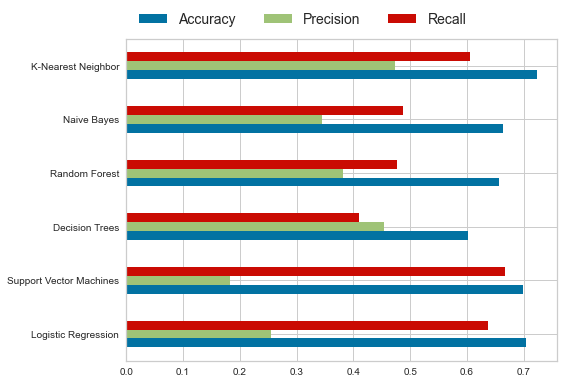

In [99]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [100]:
from pycaret.classification import *

In [101]:
dataset = df.copy()

In [102]:
data = dataset.sample(frac=0.90)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))



Data for Modeling: (746, 7)
Unseen Data For Predictions: (83, 7)


In [104]:
exp_clf101=setup(data=data, target='home_results', fold_shuffle=True, 
                 imputation_type='iterative', session_id=123) 

,Description,Value
0,session_id,123
1,Target,home_results
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(746, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [105]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6934,0.6577,0.2686,0.6708,0.3689,0.2126,0.2587,0.0070
ridge,Ridge Classifier,0.6896,0.0000,0.2461,0.6658,0.3462,0.1954,0.2437,0.0060
lr,Logistic Regression,0.6839,0.6624,0.2072,0.6687,0.3038,0.1661,0.2194,0.9380
gbc,Gradient Boosting Classifier,0.6689,0.6439,0.2801,0.5438,0.3533,0.1690,0.1894,0.0210
ada,Ada Boost Classifier,0.6649,0.6366,0.2631,0.5619,0.3438,0.1571,0.1853,0.0210
catboost,CatBoost Classifier,0.6590,0.6462,0.1958,0.5422,0.2653,0.1105,0.1378,0.1990
et,Extra Trees Classifier,0.6513,0.6616,0.4131,0.4793,0.4381,0.1926,0.1936,0.0880
rf,Random Forest Classifier,0.6495,0.6559,0.3464,0.4624,0.3855,0.1605,0.1620,0.0680
xgboost,Extreme Gradient Boosting,0.6399,0.6083,0.3807,0.4766,0.4149,0.1636,0.1688,0.2780
lightgbm,Light Gradient Boosting Machine,0.6381,0.6072,0.3627,0.4764,0.4005,0.1522,0.1599,0.4140


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [106]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6934,0.6577,0.2686,0.6708,0.3689,0.2126,0.2587,0.0060
ridge,Ridge Classifier,0.6896,0.0000,0.2461,0.6658,0.3462,0.1954,0.2437,0.0050
lr,Logistic Regression,0.6839,0.6624,0.2072,0.6687,0.3038,0.1661,0.2194,0.0150
gbc,Gradient Boosting Classifier,0.6689,0.6439,0.2801,0.5438,0.3533,0.1690,0.1894,0.0170
ada,Ada Boost Classifier,0.6649,0.6366,0.2631,0.5619,0.3438,0.1571,0.1853,0.0200
catboost,CatBoost Classifier,0.6590,0.6462,0.1958,0.5422,0.2653,0.1105,0.1378,0.1800
et,Extra Trees Classifier,0.6513,0.6616,0.4131,0.4793,0.4381,0.1926,0.1936,0.0480
rf,Random Forest Classifier,0.6495,0.6559,0.3464,0.4624,0.3855,0.1605,0.1620,0.0570
xgboost,Extreme Gradient Boosting,0.6399,0.6083,0.3807,0.4766,0.4149,0.1636,0.1688,0.2010
lightgbm,Light Gradient Boosting Machine,0.6381,0.6072,0.3627,0.4764,0.4005,0.1522,0.1599,0.3990


In [107]:
print(best_model)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [108]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [109]:
df2 = df.copy()

In [110]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6981,0.5889,0.2778,0.6250,0.3846,0.2220,0.2541
1,0.7170,0.5651,0.1667,1.0000,0.2857,0.2090,0.3416
2,0.7115,0.7222,0.2222,0.8000,0.3478,0.2323,0.3112
3,0.7308,0.7173,0.2778,0.8333,0.4167,0.2946,0.3698
4,0.6731,0.7173,0.1667,0.6000,0.2609,0.1299,0.1740
5,0.6731,0.5719,0.2222,0.5714,0.3200,0.1565,0.1868
6,0.6538,0.6422,0.4444,0.5000,0.4706,0.2148,0.2156
7,0.6731,0.7206,0.2778,0.5556,0.3704,0.1815,0.2014
8,0.6731,0.6732,0.2778,0.5556,0.3704,0.1815,0.2014
9,0.7308,0.6588,0.3529,0.6667,0.4615,0.3040,0.3313


In [ ]:
# gbc
# Mean 	0.6842 	0.6465 	0.3947 	0.5933 	0.4698 	0.2586 	0.2716

#Ida
# Mean 	0.6934 	0.6577 	0.2686 	0.6708 	0.3689 	0.2126 	0.2587

In [111]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6981,0.5222,0.2222,0.6667,0.3333,0.1970,0.2467
1,0.6981,0.5048,0.1111,1.0000,0.2000,0.1417,0.2761
2,0.7308,0.6944,0.2222,1.0000,0.3636,0.2720,0.3967
3,0.6923,0.6683,0.1667,0.7500,0.2727,0.1680,0.2450
4,0.6923,0.6765,0.1667,0.7500,0.2727,0.1680,0.2450
5,0.6731,0.6650,0.1667,0.6000,0.2609,0.1299,0.1740
6,0.6346,0.5131,0.2778,0.4545,0.3448,0.1115,0.1180
7,0.7115,0.7271,0.2778,0.7143,0.4000,0.2557,0.3052
8,0.6923,0.7092,0.2778,0.6250,0.3846,0.2180,0.2499
9,0.6731,0.6269,0.2353,0.5000,0.3200,0.1401,0.1573


In [112]:
#tuned model object is stored in the variable 'tuned_qbc'. 
print(tuned_lda)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.5, solver='eigen',
                           store_covariance=False, tol=0.0001)


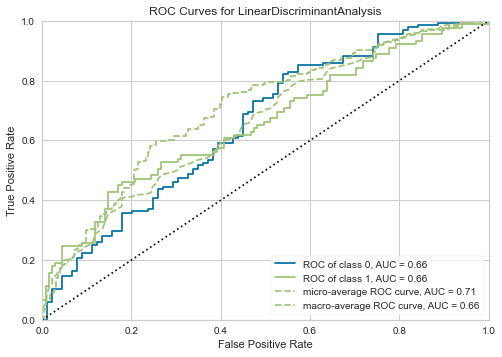

In [113]:
plot_model(tuned_lda, plot = 'auc')

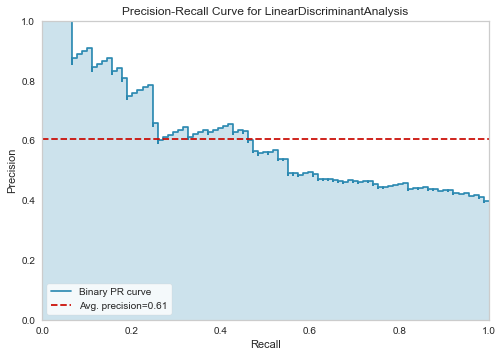

In [114]:
plot_model(tuned_lda, plot = 'pr')

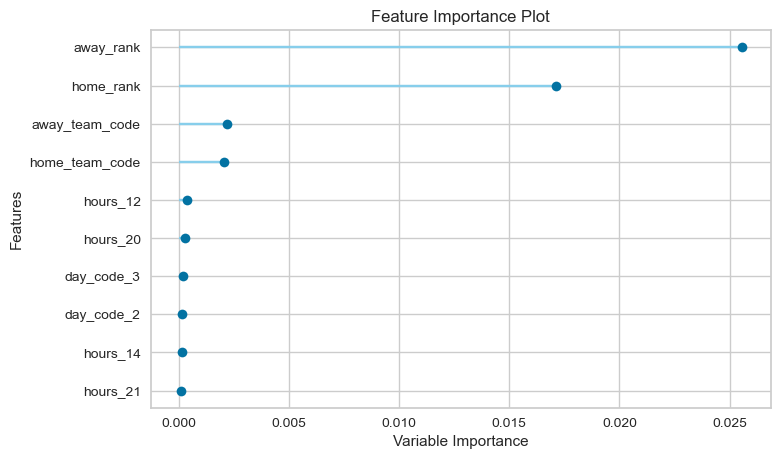

In [115]:
plot_model(tuned_lda, plot='feature')

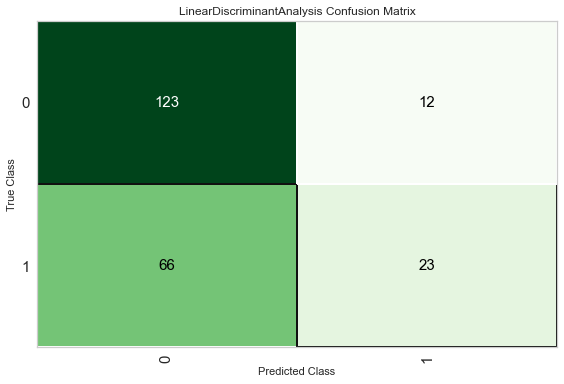

In [116]:
plot_model(tuned_lda, plot = 'confusion_matrix')

In [117]:
evaluate_model(tuned_lda)

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,0.5
solver,eigen
store_covariance,False
tol,0.0001


In [118]:
predict_model(tuned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6518,0.6558,0.2584,0.6571,0.3710,0.1891,0.2285


In [ ]:
#qbc
#  	Accuracy 	AUC 	Recall 	Prec. 	F1 	Kappa 	MCC
# 0 	Gradient Boosting Classifier 	0.6205 	0.6583 	0.2022 	0.5625 	0.2975 	0.1106 	0.1378


#ida
# Model 	Accuracy 	AUC 	Recall 	Prec. 	F1 	Kappa 	MCC
# 0 	Linear Discriminant Analysis 	0.6518 	0.6558 	0.2584 	0.6571 	0.3710 	0.1891 	0.2285



In [119]:
final_lda = finalize_model(tuned_lda)

In [120]:
#Final Random Forest model parameters for deployment
print(final_lda)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.5, solver='eigen',
                           store_covariance=False, tol=0.0001)


decrease false nagatives:
- https://www.kaggle.com/code/brandao/reducing-false-negatives-is-the-real-problem-here